# Markov Chain Monte Carlo
Lets implement an MCMC sampler using the Metropolis-Hasting algorithm.

In [1]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
%matplotlib inline

Here's some pseudo code for the Metropolis algorithm (symmetric proposal)
```
# initialize the current state x_0
x = x_0
samples[0] = x

for i in range(1, S): # S samples 

    # sample from the proposal
    x' ~ q(x'| x)

    # calculate acceptance rate
    r = min(1, p(x') / p(x))

    # accept or reject
    u ~ U(0,1)
    if r > u: # accept
        x = x'
    else: 
        x = x
    samples[i] = x
```

Lets try sample a simple 1D Gaussian distribution

In [25]:
_p = sp.stats.norm(loc=1, scale=6)
def p(x): 
    return _p.pdf(x)

In [26]:
def proposal_sample(x): 
    # sample proposal distribution x'~q(x'|x)
    q = sp.stats.norm(loc=x)
    return q.rvs()

In [27]:
x_0 = 0
S = 10000
samples = []

x = x_0 
samples.append(x) 
for i in range(1, S): 
    x_p = proposal_sample(x)
    r = np.min([1, p(x_p) / p(x)])

    u = np.random.uniform()

    if r > u: 
        x = x_p 
    samples.append(x)

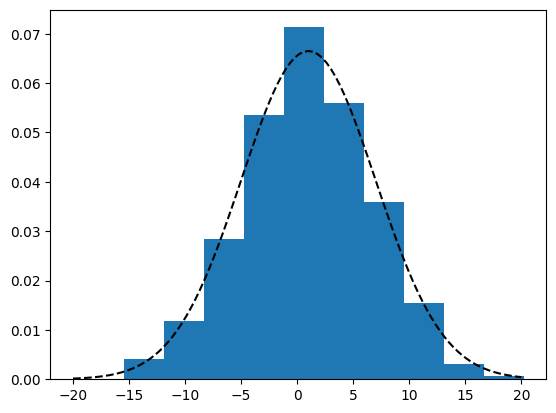

In [29]:
plt.hist(samples, density=True)
plt.plot(np.linspace(-20, 20, 100), p(np.linspace(-20, 20, 100)), c='k', ls='--')